In [39]:
# trainers_dict = eval(open('../output/figure1MNIST-20190516-203439.txt', 'r').read())
# trainers_dict

dataset_name = 'MNIST'
# dataset_name = 'CIPHAR'
# dataset_name = 'Synthetic1'
# dataset_name = 'Synthetic2'


import glob
files = glob.glob("../output/figure1" + dataset_name + "*.txt")
files.sort()

filename = files[-1]

trainers_dict = eval(open(filename, 'r').read())
trainers_dict

{'Gauss': {'tr_scores': {1: [0.10587824773788453, 0.89],
   2: [0.0887368756532669, 0.908],
   5: [0.07260251277685166, 0.93],
   10: [0.03651328176259994, 0.989],
   20: [0.021230409383773803, 0.998]},
  'te_scores': {1: [0.1361142659664154, 0.8336],
   2: [0.13555934216976165, 0.8241],
   5: [0.14673815361261366, 0.8025],
   10: [0.13527946654558182, 0.8211],
   20: [0.1510164210319519, 0.8029]},
  'lin_train_mse': 3.372241530300506e-27,
  'lin_train_ce': 0.0,
  'lin_test_mse': 0.17745070849081665,
  'lin_test_ce': 0.2188},
 'Laplace': {'tr_scores': {1: [0.10242358267307282, 0.906],
   2: [0.07504572927951812, 0.942],
   5: [0.038724139124155045, 0.989],
   10: [0.012940133571624756, 1.0],
   20: [0.0018432477489113807, 1.0]},
  'te_scores': {1: [0.13436100161075593, 0.8293],
   2: [0.12738135538101197, 0.8316],
   5: [0.1267818095445633, 0.8326],
   10: [0.12472749557495118, 0.8328],
   20: [0.1255679799079895, 0.8304]},
  'lin_train_mse': 3.221778934404082e-28,
  'lin_train_ce': 0.

Synthetic2


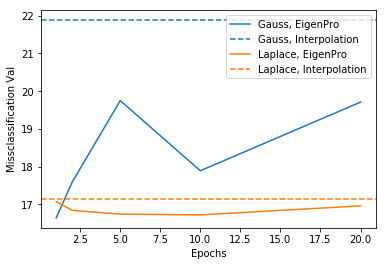

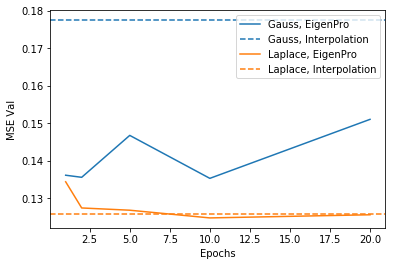

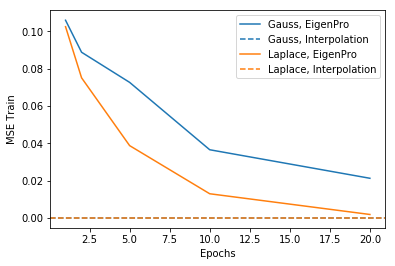

In [40]:
import matplotlib.pyplot as plt
ax = plt.gca()

print(dataset_name)

for name, trainer in trainers_dict.items():  
    
    dic = trainer['te_scores']
    
    epoch = [x for x in dic.keys()]
    mse   = [x[0] for x in dic.values()]
    miss  = [(1 - x[1]) * 100 for x in dic.values()]

    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(epoch, miss, label=name + ', EigenPro', color=color)      
    plt.axhline(y=trainer['lin_test_ce'] * 100, label=name + ', Interpolation', linestyle='--', color=color)

plt.xlabel('Epochs')
plt.ylabel('Missclassification Val')
plt.legend(loc='upper right')
        
import matplotlib2tikz
filename = '../tikz/Figure1_' + dataset_name + '_ce_test.tex'
matplotlib2tikz.save(filename)    

plt.show()

ax.set_prop_cycle(None)

for name, trainer in trainers_dict.items():  
    
    dic = trainer['te_scores']
    
    epoch = [x for x in dic.keys()]
    mse   = [x[0] for x in dic.values()]
    miss  = [x[1] for x in dic.values()]

    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(epoch, mse, label=name + ', EigenPro', color=color) 
    plt.axhline(y=trainer['lin_test_mse'], label=name + ', Interpolation', linestyle='--', color=color)
    
plt.xlabel('Epochs')
plt.ylabel('MSE Val')
plt.legend(loc='upper right')
        
import matplotlib2tikz
filename = '../tikz/Figure1_' + dataset_name + '_mse_test.tex'
matplotlib2tikz.save(filename)    

plt.show()

ax.set_prop_cycle(None)

for name, trainer in trainers_dict.items():  
    
    dic = trainer['tr_scores']
    
    epoch = [x for x in dic.keys()]
    mse   = [x[0] for x in dic.values()]
    miss  = [x[1] for x in dic.values()]

    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(epoch, mse, label=name + ', EigenPro', color=color) 
    plt.axhline(y=trainer['lin_train_mse'], label=name + ', Interpolation', linestyle='--', color=color)
    
plt.xlabel('Epochs')
plt.ylabel('MSE Train')
plt.legend(loc='upper right')
        
import matplotlib2tikz
filename = '../tikz/Figure1_' + dataset_name + '_mse_train.tex'
matplotlib2tikz.save(filename)    

plt.show()


In [41]:
del trainers_dict